# Visualise the embedding space

In this notebook we will visualise the embedding space of my bad AI joke. Using a pre-trained BERT model we reduces their dimensionality using PCA and t-SNE to make them plottable in 2D.

First we download our required packages:


*   matplotlib.pyplot: a Python library used to create plots, graphs, and visualizations.
*   Seaborn: built on top of Matplotlib and provides prettier and more informative visualizations.
*   sklearn/PCA (Principal Component Analysis): reduces the number of dimensions in data.  
*   sklearn/Lt-SNE (t-distributed Stochastic Neighbor Embedding) is another dimensionality reduction method.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from transformers import AutoTokenizer, AutoModel
import torch

We define our input text (the bad joke from the introduction). We load BERT (bert-base-uncased) to tokenize and encode the text, AutoTokenizer converts text into a format the model understands, and AutoModel provides access to BERT’s embeddings.

In [ ]:
# Define the text block
text = "When I first told my Mum I work in AI, she said - oh darling, what do you mean you work in Artificial Insemination?"

# Load a pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

We then tokenize the words into PyTorch tensors, run the text through BERT without updating gradients (torch.no_grad()) and the function outputs hidden states, which contain embeddings for each token.

In [ ]:
# Tokenize the text and get embeddings
tokens = tokenizer.tokenize(text)
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

We extracts embeddings from BERT’s last hidden state, and
squeeze(0) removes the batch dimension and converts it back into our original shape. Each token is now represented as a 768-dimensional vector capturing its meaning in context.

In [ ]:
# Extract token embeddings (take the last hidden state)
embeddings = outputs.last_hidden_state.squeeze(0)  # Shape: (sequence_length, hidden_dim)

# Map token IDs back to words
token_ids = inputs["input_ids"].squeeze(0)
words = [tokenizer.decode([tid]) for tid in token_ids]

We use Principal Component Analysis (PCA) to reduce embeddings from 768 to 25 dimensions.
This helps speed up t-SNE, which is computationally expensive.

In [ ]:
# Reduce embeddings to 2D
# Use PCA first to speed up t-SNE if necessary
pca = PCA(n_components=25)
reduced_embeddings = pca.fit_transform(embeddings.numpy())

We use t-SNE to further reduce the 25-dimensional embeddings to 2D, so they can be plotted.
perplexity=25 controls how t-SNE clusters similar words and setting our seed random_state=42 ensures reproducibility.

In [ ]:
# Apply t-SNE for better visualization
tsne = TSNE(n_components=2, perplexity=25, random_state=42)
tsne_embeddings = tsne.fit_transform(reduced_embeddings)

We use matplotlib and seaborn to plot these words on a 2D map.

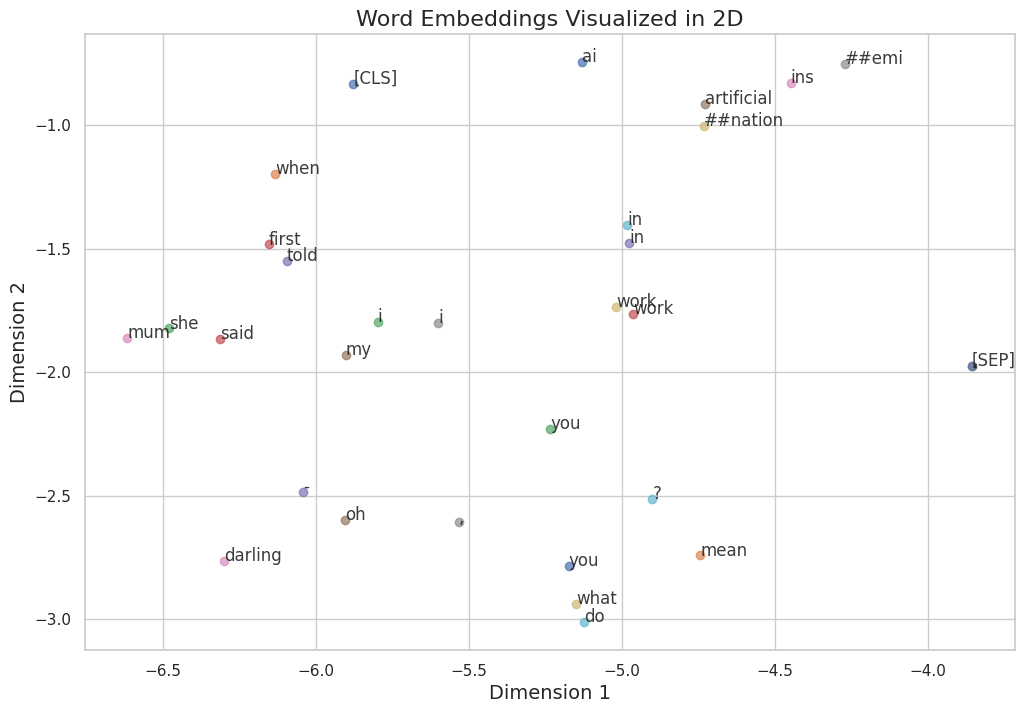

In [ ]:
# Plot the embeddings
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the points and overlay words as labels
for word, (x, y) in zip(words, tsne_embeddings):
    plt.scatter(x, y, alpha=0.7)
    plt.text(x, y, word, fontsize=12, alpha=0.9)  # Superimpose words at their coordinates

plt.title("Word Embeddings Visualized in 2D", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.show()

We can see some words are more similar than others, and from here we can play around testing other sentences and using clustering techniques.